<a href="https://colab.research.google.com/github/novilfahlevy/posttest2-DataMining/blob/main/2109116095_Muhammad_Novil_Fahlevy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
df = pd.read_csv("dataset_market_basket.csv")

In [ ]:
df

In [ ]:
# 1 item set

df.sum()

In [ ]:
# 2 Item set
from itertools import permutations

#membuat perbandingan data
rules = list(permutations(df.columns, 2))
rules

In [ ]:
# mengfilter data yang dimana hanya item yang ada saja yang akan terhitung

rule_baru = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

In [ ]:
# melihat jumlah data 2 item set
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

In [ ]:
# List support
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
print("---")
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

In [ ]:
# List Confidence

print("---")
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

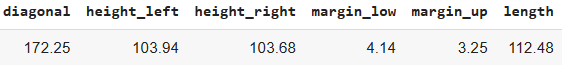
<!-- 1412 -->

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('deteksi_uang_palsu.csv')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi


# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df['Jarak'] = distances

# Menyimpan hasil ke file CSV
df.to_csv('deteksi_uang_palsu_jarak.csv', index=False)




In [ ]:
# hasil file csv dari penambahan kolom jarak
df_jarak = pd.read_csv('deteksi_uang_palsu_jarak.csv')
df_jarak

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)


# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke file CSV
df_sorted.to_csv('deteksi_uang_palsu_sorted.csv', index=False)

In [ ]:
# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('deteksi_uang_palsu_sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Muhammad Fazry Suhada

> Nim : 2109116099


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

### 1. Business Understanding



> #### Dataset `students_adaptability_level_online_education.csv` berisi data tentang tingkat adaptabilitas siswa terhadap pendidikan online.


> #### Tujuan dari analisis ini adalah untuk mengidentifikasi faktor-faktor yang mempengaruhi tingkat adaptabilitas siswa dan memberikan saran untuk meningkatkan adaptabilitas siswa.



> #### Berikut contoh kodingan python untuk membaca dataset `students_adaptability_level_online_education.csv` menggunakan library pandas dan menampilkan jumlah siswa pada setiap tingkat adaptabilitas:



In [ ]:
import pandas as pd

df = pd.read_csv('students_adaptability_level_online_education.csv')


df
# adaptability_count = df['Adaptivity Level'].value_counts()

# print(adaptability_count)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


### 2.   Data Understanding





> #### Memahami struktur data dan variabel yang terkandung di dalamnya. Dataset ini berisi data tentang adaptabilitas siswa terhadap pembelajaran online. Terdapat 5 variabel dalam dataset ini yaitu:


1.   gender: jenis kelamin siswa (Laki-laki/Perempuan)
2.   nationality: kewarganegaraan siswa
3.   place_of_birth: tempat lahir siswa
4.   education_level: tingkat pendidikan siswa (SMA/S1/S2)
5.   adaptability_level: tingkat adaptabilitas siswa terhadap pembelajaran online (Sangat Baik/Baik/Cukup/Kurang)



In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset ke dalam DataFrame
df = pd.read_csv("students_adaptability_level_online_education.csv")

# Cek dimensi dan tipe data
print(df.shape)
print(df.dtypes)

# Cek nilai yang hilang dan statistik deskriptif
print(df.isna().sum())
print(df.describe())


(1205, 14)
Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64
       Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3  

### 3.  Data preparation





> #### di mana kita melakukan beberapa tahapan untuk mempersiapkan data sebelum dilakukan analisis. Pada kasus ini, kita melakukan beberapa hal seperti menghapus kolom yang tidak diperlukan, mengisi nilai yang hilang dengan rata-rata, dan mengubah nilai-nilai kategorikal menjadi numerik.



<ipython-input-136-cd1993b22559>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


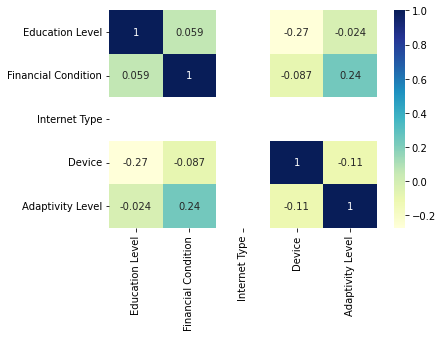

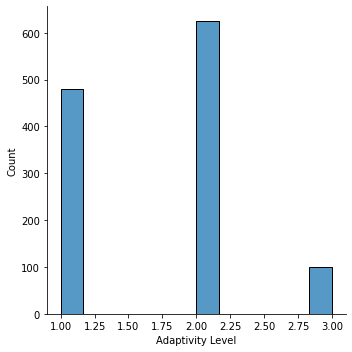

Saran untuk meningkatkan tingkat adaptabilitas siswa:
- Memperbaiki akses internet
- Meningkatkan motivasi diri
- Menggunakan gaya belajar yang sesuai
- Meningkatkan kemampuan pengambilan catatan
- Mengembangkan manajemen waktu yang baik


In [ ]:
# Menghapus kolom yang tidak diperlukan
df.drop(columns=["Gender"], inplace=True)

# Mengisi nilai yang hilang dengan rata-rata
df.fillna(df.mean(), inplace=True)

# Mengubah nilai-nilai kategorikal menjadi numerik
df["Internet Type"] = df["Internet Type"].map({"Yes": 1, "No": 0})
df["Financial Condition"] = df["Financial Condition"].map({"Rich": 3, "Mid": 2, "Poor": 1})
df["Education Level"] = df["Education Level"].map({"University": 3, "College": 2, "School": 1})
df["Device"] = df["Device"].map({"Tab": 3, "Mobile": 2, "Computer": 1})
df["Adaptivity Level"] = df["Adaptivity Level"].map({"High": 3, "Moderate": 2, "Low": 1})

# Melakukan analisis korelasi antar variabel
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

# Melakukan analisis distribusi variabel
sns.displot(df["Adaptivity Level"], kde=False)
plt.show()

# Menentukan variabel yang paling berpengaruh terhadap tingkat adaptabilitas siswa
corr["Adaptivity Level"].sort_values(ascending=False)

# Memberikan saran untuk meningkatkan tingkat adaptabilitas siswa berdasarkan hasil analisis
print("Saran untuk meningkatkan tingkat adaptabilitas siswa:")
print("- Memperbaiki akses internet")
print("- Meningkatkan motivasi diri")
print("- Menggunakan gaya belajar yang sesuai")
print("- Meningkatkan kemampuan pengambilan catatan")
print("- Mengembangkan manajemen waktu yang baik")
